In [1]:
import matplotlib
import matplotlib.pyplot as plt

def plot_label(x, y):
    fig, ax = plt.subplots(figsize=(50,10))
    ax.plot(x, y)

    ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
    ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator(list(range(1,13))))

    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%b\n%Y"))
    ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")

    plt.show()

# Notebooks to explore the unofficial Google Trends API: pyTrends

pyTrends gitHub with documentation: https://github.com/GeneralMills/pytrends

### Install pyTrends

In [2]:
# %pip install pytrends # To do only once

In [3]:
from pytrends.request import TrendReq
import datetime as dt
import os, time
import numpy as np
import pandas as pd

# Set the local time zone
os.environ['TZ'] = 'America/Montreal'
time.tzset()

pytrends = TrendReq(hl='en-US', tz=360)

In [4]:
# kw_list = ["STM"] #,"tempête"
# pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='CA-QC', gprop='') # default: today 5-y

In [5]:
# current_dt = dt.datetime.now()

# trends_df = pytrends.get_historical_interest(kw_list, year_start=2017,
#                                              month_start=10, day_start=1,
#                                              hour_start=0, year_end=current_dt.year,
#                                              month_end=current_dt.month,
#                                              day_end=current_dt.day,
#                                              hour_end=current_dt.hour, cat=0, geo='', gprop='', sleep=0.5)

In [6]:
# trends_df

In [7]:
# trends_df = trends_df.reset_index().rename(columns={'date':'datetime'})

In [8]:
# trends_df['date'] = trends_df['datetime'].apply(lambda x: x.date())
# trends_df['hour'] = trends_df['datetime'].apply(lambda x: x.time().hour)

In [9]:
# agg_df = pd.DataFrame(trends_df.groupby('date')['STM'].max().reset_index().values, columns=['date','value'])
# agg_df.set_index(agg_df.date)

In [10]:
# agg_df

In [11]:
# plot_label(x=agg_df.date, y=agg_df.value)

In [12]:
# kw_list = ["STM"]
# pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='CA-QC', gprop='')
# interest_df = pytrends.interest_over_time()

In [13]:
# interest_df

In [14]:
# df = interest_df.resample('D', closed='right').ffill().reset_index()
# df['daily_value'] = -1
# df.loc[df.date >= np.datetime64(agg_df.date.min()), 'daily_value'] = agg_df.loc[0:917,'value'].values
# interest_5y_df = df.loc[df.date >= np.datetime64(agg_df.date.min())]

In [15]:
# plot_label(x=interest_5y_df.date, y=interest_5y_df.STM)

In [16]:
# def substract(a, b):
#     return a-b

# df2['trend'] = np.vectorize(substract) (df2['STM'], df2['daily_value'])

In [17]:
# df2['month'] = df2['date'].apply(lambda x: x.month)

In [18]:
# plot_label(x=df2.date, y=df2.result)

In [19]:
# bar_df = df2.groupby('month')['trend'].sum()
# month_list = ['jan','fév','mar','avr','mai','jun','jui','aoû','sep','oct','nov','déc']
# plt.bar(x=month_list, height=bar_df.values)

This chart above looks like the official incident charts from the STM
* Differences can be explain by the impact on the public: a single accident (such as the flooding of the station Square Victoria-OACI on november 14th 2019) have a huge impact on the public

<img src="http://www.stm.info/sites/default/files/media/Stminfo/images/2019/histogramme_fr_2019-10.png" width="50%" height="50%">

### Save the dataframe to the GCP bucket

In [20]:
# gs_uri = 'gs://videotron-ai-bucket/'
# dataset_path = gs_uri + 'dataset/'
# df2.to_csv(dataset_path + 'google_trend_STM.csv', index=False)

In [21]:
### Get the 3 months 

In [22]:
# kw_list = ["STM"]
# pytrends.build_payload(kw_list, cat=0, timeframe='today 3-m', geo='CA-QC', gprop='')
# interest_3m_df = pytrends.interest_over_time()
# interest_3m_df

In [23]:
# plot_label(x=interest_3m_df.index, y=interest_3m_df.STM)

In [24]:
# from sklearn.metrics import mean_squared_error, r2_score

# agg_df = pd.DataFrame(trends_df.groupby('date')['STM'].mean().reset_index().values, columns=['date','value'])
# agg_df.set_index(agg_df.date)

# dataset = pd.DataFrame(agg_df['value'].astype('int').values, columns=['value_agg']).set_index(agg_df['date'])
# dataset['hebdo_value'] = interest_5y_df.set_index(interest_5y_df['date'])['STM']
# dataset['label'] = interest_3m_df['STM']
# dataset = dataset.reset_index()

# condition = (~dataset['label'].isna())&(~dataset['hebdo_value'].isna())

# fig, ax = plt.subplots(figsize=(10,10))
# ax.plot(dataset.loc[condition]['date'], dataset.loc[condition]['hebdo_value'], label='weekly interest')
# ax.plot(dataset.loc[condition]['date'], dataset.loc[condition]['label'], label='daily interest')
# # ax.plot(dataset['date'], dataset['hebdo_value'], label='weekly interest')
# # ax.plot(dataset['date'], dataset['label'], label='daily interest')

# ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
# ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator(list(range(1,13))))

# ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%b\n%Y"))
# ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
# plt.setp(ax.get_xticklabels(), rotation=0, ha="center")

# ax.set_ylabel('Interest')

# ax.set_title('Weekly interest vs daily interest\n')

# plt.legend()

# plt.show()

In [25]:
# dataset.loc[condition]

In [26]:
# y1 = dataset.loc[(~dataset['label'].isna())&(~dataset['hebdo_value'].isna())]['hebdo_value']
# y2 = dataset.loc[(~dataset['label'].isna())&(~dataset['hebdo_value'].isna())]['label']

# mse_score = mean_squared_error(y1, y2)
# rmse_score = mean_squared_error(y1, y2, squared=False)
# r2_score = r2_score(y1, y2)
# print('MSE: %f' % ( mse_score))
# print('RMSE: %f' % (rmse_score))
# print('R2: %f' % (r2_score))

# Build a dataset out of interest overt time for multiple keywords 

In [27]:
kw_list1 = ['STM', 'tempête', 'neige', 'traffic', 'manifestation']
kw_list2 = ['videotron', 'hydro québec', 'service client videotron', 'illico tv', 'club illico ']
kw_list3 = ['helix', 'videotron plus', 'forfait mobile videotron', 'panne videotron']
kw_lists = [kw_list1, kw_list2, kw_list3]

for i, kw_list in enumerate(kw_lists):
    pytrends.build_payload(kw_list, cat=0, timeframe='today 3-m', geo='CA-QC', gprop='')
    if i == 0:
        interest_3m_df = pytrends.interest_over_time().drop(columns=['isPartial'])
    else:
        tmp_df = pytrends.interest_over_time().drop(columns=['isPartial'])
        interest_3m_df = pd.concat([interest_3m_df, tmp_df], axis=1)

In [28]:
for i, kw_list in enumerate(kw_lists):
    pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='CA-QC', gprop='')
    if i == 0:
        interest_5y_df = pytrends.interest_over_time().drop(columns=['isPartial'])
    else:
        tmp_df = pytrends.interest_over_time().drop(columns=['isPartial'])
        interest_5y_df = pd.concat([interest_5y_df, tmp_df], axis=1)
        
interest_5y_df = interest_5y_df.resample('D', closed='right').ffill()

### Replace the less precise weekly value of the last 3 months with the more precise daily value

In [29]:
min_dt = interest_3m_df.index.min()
dataset = interest_5y_df.loc[interest_5y_df.index<min_dt].append(interest_3m_df)

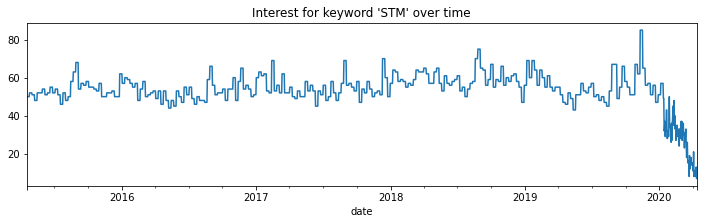

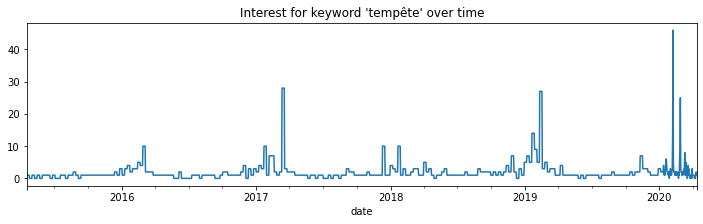

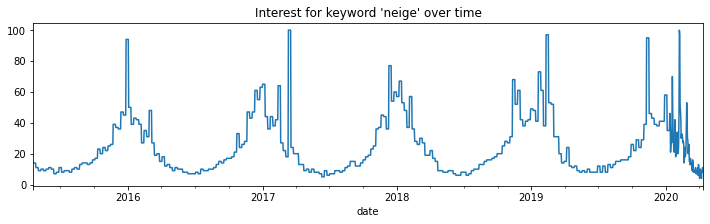

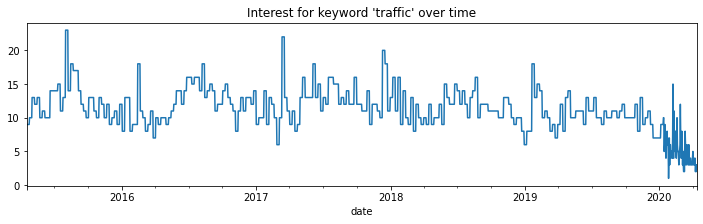

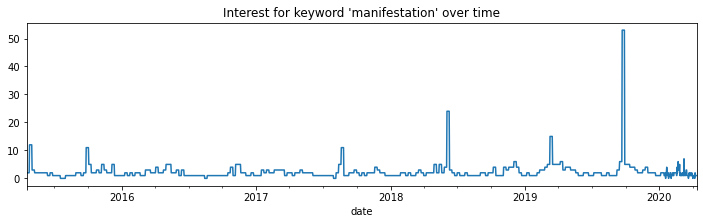

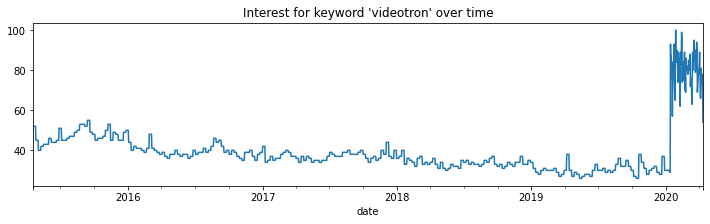

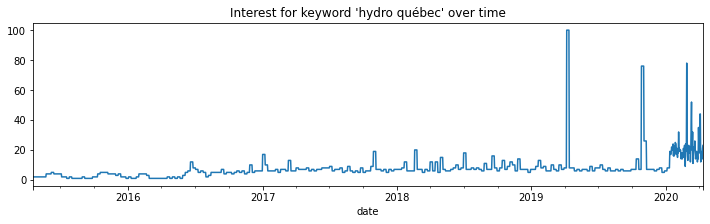

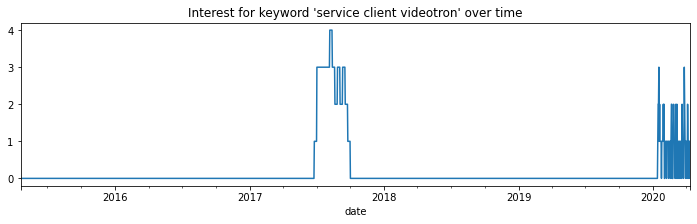

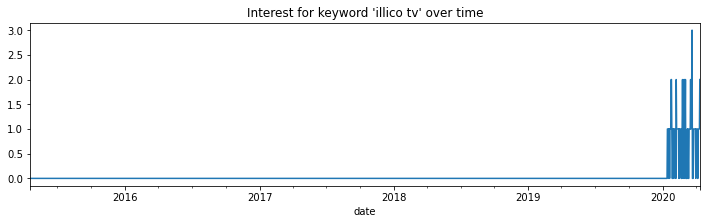

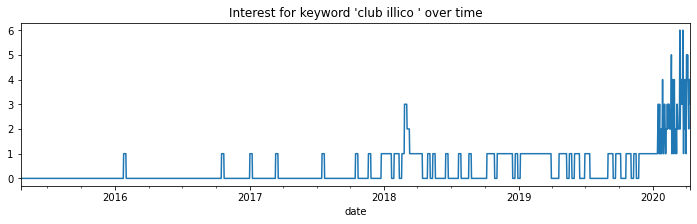

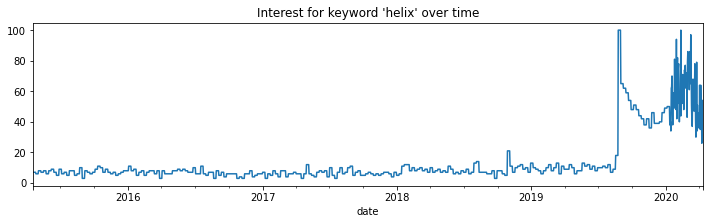

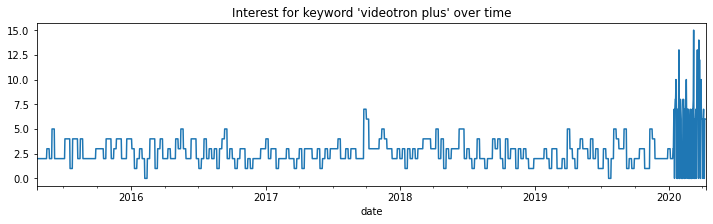

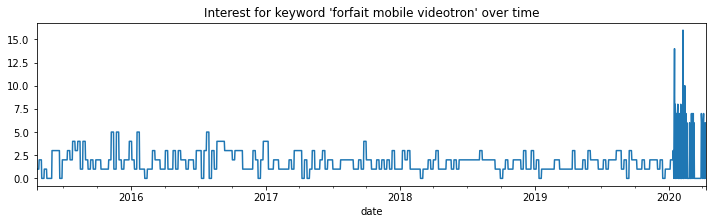

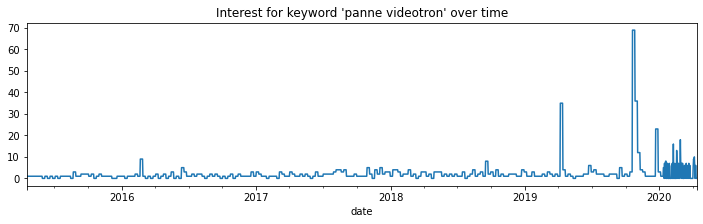

In [30]:
for col in dataset.columns.values:
    fig, ax = plt.subplots(figsize=(12,3))
    
    ax.set_title(f'Interest for keyword \'{col}\' over time')
    ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
    ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator(list(range(1,13))))

    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%b\n%Y"))
    ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
    dataset[col].plot(ax=ax)

### Save the dataset as csv

In [31]:
gs_uri = 'gs://videotron-ai-bucket/'
dataset_path = gs_uri + 'dataset/'
dataset["date"] = dataset.index
dataset.to_csv(dataset_path + 'keyword_trends_dataset.csv', index=False)